<a href="https://colab.research.google.com/github/CristianoCoelhoSilva/Python/blob/master/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Arquivo completo
df = pd.read_csv(r"https://raw.githubusercontent.com/CristianoCoelhoSilva/Python/master/Python/covid.csv")

#Removendo as colunas
df.drop(["GENERO","RACA","MES","NUMERO","SEMANA","NUMERO_ENTREVISTA","NUMERO_ORDEM","UF","SITUACAO","DOMICILIO","RESPONDEU","ESCOLARIDADE","ESTABELECIMENTO"], axis="columns", inplace=True)
df.drop(["B006"], axis="columns", inplace=True)

name = ['Idade', 'Febre', 'Tosse', 'Garganta', 'Respirar','Cabeca', 'Peito', 'Nausea', 'Nariz', 'Fadiga', 'Olhos', 'Olfato','Muscular', 'Diarreia', 'Diabetes', 'Hipertensão', 'Respiratorio', 'Coração', 'Depressão', 'Cancer']


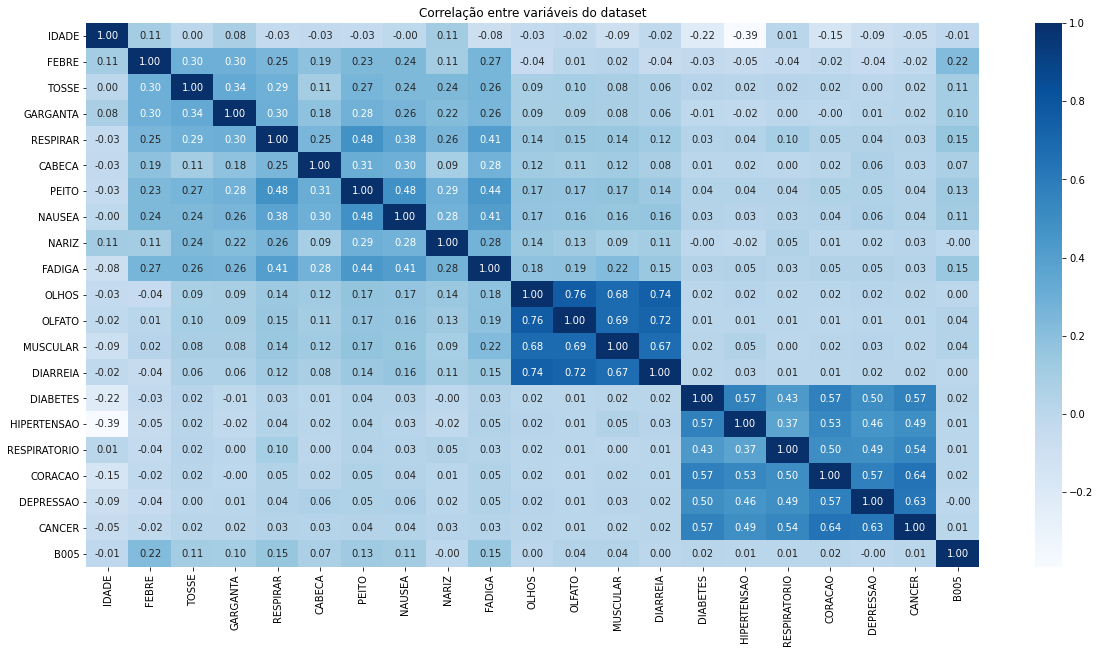

In [2]:
import matplotlib.pyplot as plt
import seaborn


a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)

seaborn.heatmap(df.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns# Carregando dataset

X = df.drop(['B005'], axis = "columns")
y = df.B005

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

X_train

# Cria nosso pipeline para pré-processamento com imputação, dummização e normalização
encoder_imputer_scaled_transformer = make_column_transformer(
    (make_pipeline(
        (KNNImputer(n_neighbors = 3)),
        (StandardScaler())
    ) , make_column_selector(dtype_include = np.number)),
    (make_pipeline(
        SimpleImputer(strategy = 'most_frequent'),
        OneHotEncoder(handle_unknown = 'ignore'),
    ), make_column_selector(dtype_exclude = np.number)),
    remainder = 'passthrough'
)

encoder_imputer_scaled_transformer.fit(X_train)

X_train_processed = encoder_imputer_scaled_transformer.transform(X_train)
X_test_processed = encoder_imputer_scaled_transformer.transform(X_test)

model  = RandomForestClassifier()
model.fit(X_train_processed, y_train)# Mostrando importância de cada feature
model.feature_importances_


array([0.45905752, 0.05104696, 0.03086609, 0.02948019, 0.02804189,
       0.03366403, 0.02606034, 0.02571109, 0.0344315 , 0.02750016,
       0.03122588, 0.03400958, 0.03108495, 0.0304206 , 0.02103174,
       0.02977444, 0.0269618 , 0.01768431, 0.02201556, 0.00993137])

Text(0.5, 1.0, 'Importância de cada feature')

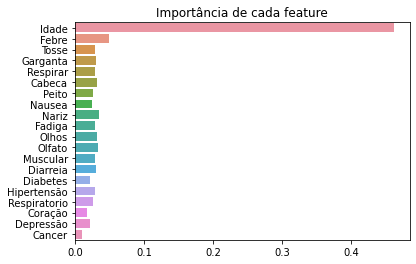

In [4]:
importances = pd.Series(data=model.feature_importances_, index=name)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
X_train_processed.size

## Coefficients

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

cv = CountVectorizer()

cv.fit(X)
X_train = cv.transform(X)

svm = LinearSVC()
svm.fit(X_train_processed, y_train)
plot_coefficients(svm, cv.get_feature_names())

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)

In [20]:
# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [21]:
print ("Ridge model:", pretty_print_coefs(ridge.coef_))

NameError: ignored

In [18]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000985
Best score using built-in LassoCV: 0.072031


Text(0.5, 1.0, 'Feature importance using Lasso Model')

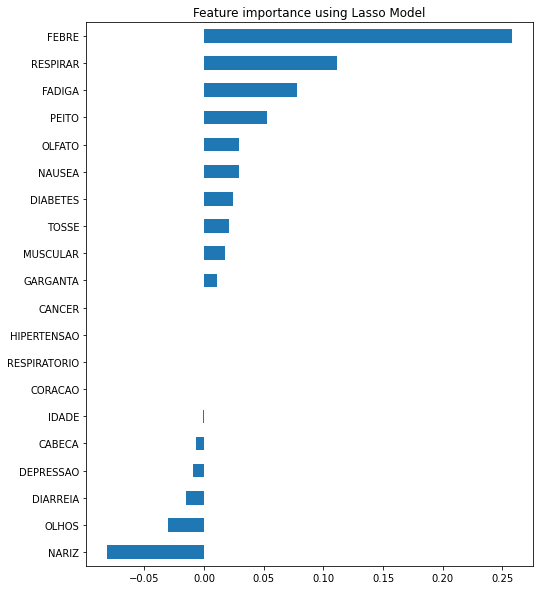

In [19]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")